In [15]:
import tensorflow as tf
import numpy as np# Parameters
learning_rate = 0.01
training_epochs = 1000
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [16]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2].ravel()*100

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_Y_train = diabetes.target[:-20]
diabetes_Y_test = diabetes.target[-20:]

In [22]:
rng = np.random

#tensorflow must be reset
tf.reset_default_graph()

# Parameters
learning_rate = 0.1
training_epochs = 100
display_step = 10

n_samples = diabetes_X_train.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0010 cost= 3544.428955078 W= 9.84316 b= 96.9593
Epoch: 0020 cost= 2188.156005859 W= 9.42006 b= 132.392
Epoch: 0030 cost= 2005.937622070 W= 9.26468 b= 145.405
Epoch: 0040 cost= 1981.619018555 W= 9.20762 b= 150.184
Epoch: 0050 cost= 1978.433227539 W= 9.18666 b= 151.939
Epoch: 0060 cost= 1978.038085938 W= 9.17896 b= 152.583
Epoch: 0070 cost= 1977.997436523 W= 9.17614 b= 152.82
Epoch: 0080 cost= 1977.996459961 W= 9.1751 b= 152.907
Epoch: 0090 cost= 1977.998413086 W= 9.17473 b= 152.938
Epoch: 0100 cost= 1977.999023438 W= 9.17458 b= 152.95
Optimization Finished!
Training cost= 1978.0 W= 9.17458 b= 152.95 



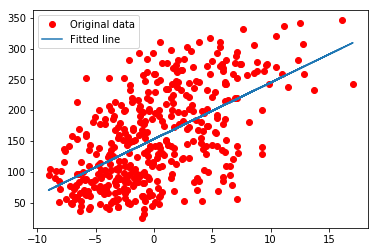

In [25]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(diabetes_X_train, diabetes_Y_train):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: diabetes_X_train, Y:diabetes_Y_train})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: diabetes_X_train, Y: diabetes_Y_train})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    plt.plot(diabetes_X_train, diabetes_Y_train, 'ro', label='Original data')
    plt.plot(diabetes_X_train, sess.run(W) * diabetes_X_train + sess.run(b) , label='Fitted line')
    plt.legend()
    plt.show()